# KNN no `chb07_com_dwt`

Explorando 20 rodadas de classificação com `KNN` em sua configuração padrão com o dataframe extraído com DWT para encontrar canal com melhor desempenho.

Por fim salvando a tabela com médias, desvios padrão e medianas do desempenho de cada canal.

## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

seed_array = np.load('./../20_seeds.npy')
print(f'seeds: {seed_array}')

seeds: [4382 8968 8442 1729  290  490 2128 1167 8900 5078 1359  894 7809 6990
 3623 5906 1687 7080 5473 7854]


## 20 rodadas

In [2]:
chb_DF = pd.read_csv('./chb07_com_dwt.csv')
target_S = chb_DF.pop('target')

accuracy_DF = pd.DataFrame()

# agrupa todas colunas pelo mesmo número do canal
colunas_agrupadas_por_numero = []
for i in range(18):
    colunas_agrupadas_por_numero.append(
        [column for column in chb_DF.columns if f'{i}' in column.split('-')]
    )

for numero_da_coluna, colunas in enumerate(colunas_agrupadas_por_numero):
    X, y = chb_DF[colunas].values, target_S.values

    acc = []   

    for seed in seed_array:
        # Distribuindo os dados
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
        
        # Instanciando e treinando classificador
        model = KNeighborsClassifier().fit(X_train, y_train)

        # Adicionando resultados às respectivas listas
        acc.append(model.score(X_test, y_test))

    accuracy_DF[f'{numero_da_coluna}'] = acc

accuracy_DF

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.770833,0.916667,0.875000,0.947917,0.864583,0.958333,0.958333,0.958333,0.802083,0.906250,0.979167,0.937500,0.843750,0.958333,0.947917,0.916667,0.937500,0.927083
1,0.895833,0.885417,0.895833,0.895833,0.822917,0.937500,0.906250,0.927083,0.770833,0.885417,0.979167,0.895833,0.906250,0.927083,0.979167,0.947917,0.947917,0.937500
2,0.833333,0.916667,0.916667,0.864583,0.843750,0.927083,0.947917,0.968750,0.854167,0.927083,0.968750,0.968750,0.760417,0.937500,0.968750,0.947917,0.968750,0.947917
3,0.854167,0.916667,0.916667,0.833333,0.812500,0.916667,0.927083,0.927083,0.760417,0.906250,0.958333,0.937500,0.822917,0.937500,0.937500,0.916667,0.958333,0.906250
4,0.739583,0.906250,0.875000,0.833333,0.781250,0.906250,0.906250,0.968750,0.781250,0.916667,0.958333,0.927083,0.802083,0.937500,0.979167,0.927083,0.927083,0.927083
5,0.822917,0.937500,0.916667,0.895833,0.833333,0.937500,0.947917,0.937500,0.854167,0.927083,1.000000,0.968750,0.843750,0.968750,0.979167,0.937500,0.979167,0.937500
6,0.916667,0.947917,0.916667,0.875000,0.885417,0.927083,0.968750,0.937500,0.833333,0.906250,0.989583,0.927083,0.802083,0.927083,0.979167,0.937500,0.958333,0.947917
7,0.781250,0.906250,0.885417,0.854167,0.875000,0.937500,0.958333,0.937500,0.791667,0.895833,0.989583,0.947917,0.812500,0.958333,0.989583,0.968750,0.968750,0.937500
8,0.760417,0.916667,0.875000,0.906250,0.843750,0.927083,0.927083,0.947917,0.760417,0.947917,0.979167,0.947917,0.833333,0.885417,0.968750,0.916667,0.947917,0.916667
9,0.822917,0.947917,0.927083,0.864583,0.854167,0.927083,0.947917,0.927083,0.802083,0.937500,0.979167,0.927083,0.812500,0.958333,0.968750,0.927083,0.958333,0.968750


,count,mean,std,min,25%,50%,75%,max
10,20.0,0.971354,0.017520,0.927083,0.958333,0.979167,0.979167,1.000000
14,20.0,0.967187,0.017324,0.927083,0.958333,0.968750,0.979167,1.000000
16,20.0,0.947917,0.020833,0.895833,0.927083,0.953125,0.960938,0.979167
7,20.0,0.939063,0.018286,0.906250,0.927083,0.937500,0.950521,0.968750
6,20.0,0.933854,0.023482,0.875000,0.924479,0.927083,0.947917,0.968750
17,20.0,0.932292,0.019267,0.885417,0.924479,0.937500,0.940104,0.968750
13,20.0,0.931250,0.025605,0.885417,0.906250,0.937500,0.950521,0.968750
5,20.0,0.929167,0.018998,0.885417,0.916667,0.932292,0.937500,0.958333
15,20.0,0.927083,0.024604,0.875000,0.916667,0.927083,0.947917,0.968750
11,20.0,0.925000,0.027163,0.875000,0.906250,0.927083,0.940104,0.968750


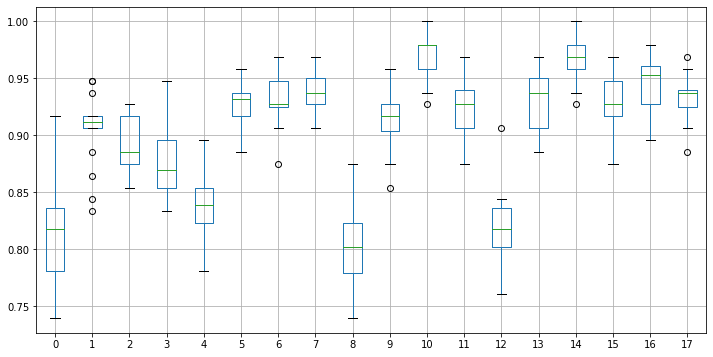

In [3]:
accuracy_DF.boxplot(figsize=(12, 6))
accuracy_DF.describe().transpose().sort_values(by='mean', ascending=False)

## Salvando rank em arquivo csv

In [4]:
save_DF = accuracy_DF.describe().transpose()[['mean', 'std', '50%']]
save_DF['chb'] = '07'
save_DF['channel'] = save_DF.index

save_DF.to_csv(path_or_buf='./knn_descr_channel_rank.csv', index=False)
save_DF

,mean,std,50%,chb,channel
0,0.815625,0.046228,0.817708,07,0
1,0.905729,0.029555,0.911458,07,1
2,0.891146,0.022026,0.885417,07,2
3,0.874479,0.030318,0.869792,07,3
4,0.839583,0.029733,0.838542,07,4
5,0.929167,0.018998,0.932292,07,5
6,0.933854,0.023482,0.927083,07,6
7,0.939063,0.018286,0.937500,07,7
8,0.802604,0.035036,0.802083,07,8
9,0.913021,0.025353,0.916667,07,9
